In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/Ganesha/Desktop/Sem 1/Datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Separate the feature and target sets
df.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender'],inplace=True)

y = df['Exited'].values
x = df.loc[:,df.columns != 'Exited'].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


<AxesSubplot:ylabel='count'>

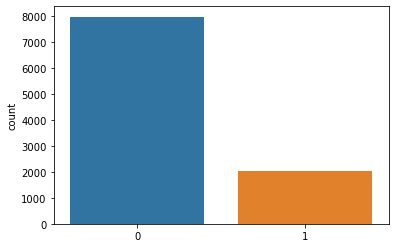

In [5]:
import seaborn as sns
sns.countplot(x=y)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
235/235 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.7895
Epoch 2/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8444
Epoch 3/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8525
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8528
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8528
Epoch 6/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8548
Epoch 7/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8567
Epoch 8/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8567
Epoch 9/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8581
Epoch 10/10
235/235 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8587

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)


79/79 [==============================] - 0s 2ms/step
Accuracy: 0.8572
Confusion Matrix:
[[1950   53]
 [ 304  193]]


# To implement the improvement

In [18]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),  # Input layer with the same number of features
    keras.layers.Dense(128, activation='relu'),    # Increased the number of neurons in the first hidden layer
    keras.layers.Dropout(0.3),                    # Added dropout to prevent overfitting
    keras.layers.Dense(64, activation='relu'),     # Added another hidden layer
    keras.layers.BatchNormalization(),             # Batch normalization layer
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Step 5: Print the accuracy score and confusion matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Epoch 1/50
211/211 [==============================] - 2s 5ms/step - loss: 0.5242 - accuracy: 0.7511 - val_loss: 0.4092 - val_accuracy: 0.8333
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8252 - val_loss: 0.3764 - val_accuracy: 0.8400
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3906 - accuracy: 0.8344 - val_loss: 0.3525 - val_accuracy: 0.8440
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3849 - accuracy: 0.8427 - val_loss: 0.3530 - val_accuracy: 0.8520
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3813 - accuracy: 0.8422 - val_loss: 0.3549 - val_accuracy: 0.8480
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8474 - val_loss: 0.3569 - val_accuracy: 0.8467
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.3754 - accuracy: 0.8452 - val_loss: 0.3595 - val_accuracy: 0.8547
Epoch 